# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 8.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
83690,0.0220,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,10,0,10,0
104904,0.0171,0.1709,0.0342,0.0024,0.0024,0.0024,0.1123,0.2539,0.0024,0.1392,5,5,1,1
228408,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0537,0.0024,0.0024,0,0,0,0
263889,0.0879,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0464,0.0024,0.0024,0,0,0,0
321718,0.0098,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0659,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.shape

(449730, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449730 entries, 0 to 449729
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          449730 non-null  float64
 1   Emg2          449730 non-null  float64
 2   Emg3          449730 non-null  float64
 3   Emg4          449730 non-null  float64
 4   Emg5          449730 non-null  float64
 5   Emg6          449730 non-null  float64
 6   Emg7          449730 non-null  float64
 7   Emg8          449730 non-null  float64
 8   Emg9          449730 non-null  float64
 9   Emg10         449730 non-null  float64
 10  repetition    449730 non-null  int64  
 11  rerepetition  449730 non-null  int64  
 12  stimulus      449730 non-null  int64  
 13  restimulus    449730 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.0 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000,449730.000000
mean,0.009672,0.077479,0.072574,0.050732,0.022604,0.050304,0.215483,0.240273,0.077911,0.196562,3.278532,2.272719,5.811698,4.161110
std,0.014184,0.193192,0.232346,0.150322,0.063215,0.096565,0.406609,0.383662,0.201897,0.360472,3.492835,3.274170,6.608935,6.308636
min,0.000000,0.000000,0.002400,0.002400,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.031700,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.002400,0.002400,0.002400,0.002400,0.004900,0.080600,0.100100,0.002400,0.046400,2.000000,0.000000,3.000000,0.000000
75%,0.012200,0.058600,0.029300,0.022000,0.007300,0.061000,0.273400,0.300300,0.053700,0.249000,6.000000,4.000000,11.000000,8.000000
max,0.820300,3.728000,4.663100,3.754900,1.384300,1.635700,4.665500,4.668000,3.415500,4.663100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     181641
12     15520
2      15500
4      15500
8      15495
7      15494
9      15474
11     15470
6      15458
5      15452
3      15436
10     15417
1      15408
14     10345
13     10336
17     10328
15     10292
16     10267
19      5175
21      5162
18      5160
23      5138
20      5132
22      5130
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

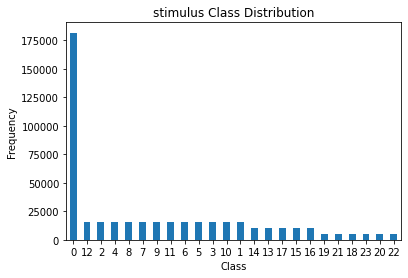

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
420186,0.0171,0.0024,0.0024,0.0024,0.0024,0.0073,0.1123,0.0146,0.0024,0.0024,0,0,0,0
252000,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,0.0049,0.0684,0.0513,0,0,0,0
441343,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.1538,0.0024,0.0024,0,0,0,0
338786,0.0024,0.0024,0.0024,0.0024,0.0049,0.0562,0.1489,0.1221,0.0024,0.0098,0,0,0,0
372141,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0513,0.1099,0.0024,0.0024,0,0,0,0


In [12]:
raw_data.shape

(364664, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364664 entries, 0 to 449729
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          364664 non-null  float64
 1   Emg2          364664 non-null  float64
 2   Emg3          364664 non-null  float64
 3   Emg4          364664 non-null  float64
 4   Emg5          364664 non-null  float64
 5   Emg6          364664 non-null  float64
 6   Emg7          364664 non-null  float64
 7   Emg8          364664 non-null  float64
 8   Emg9          364664 non-null  float64
 9   Emg10         364664 non-null  float64
 10  repetition    364664 non-null  int64  
 11  rerepetition  364664 non-null  int64  
 12  stimulus      364664 non-null  int64  
 13  restimulus    364664 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 41.7 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

Accuracy is: 83.63429448946293


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     36119
           1       0.87      0.86      0.86      1954
           2       0.81      0.82      0.82      1922
           3       0.74      0.76      0.75      2033
           4       0.75      0.75      0.75      2058
           5       0.70      0.69      0.69      2110
           6       0.81      0.81      0.81      2091
           7       0.71      0.71      0.71      2167
           8       0.74      0.74      0.74      2207
           9       0.70      0.68      0.69      2223
          10       0.71      0.68      0.69      1851
          11       0.78      0.78      0.78      2086
          12       0.75      0.74      0.74      2125
          13       0.76      0.76      0.76      1388
          14       0.66      0.67      0.66      1386
          15       0.69      0.71      0.70      1459
          16       0.76      0.78      0.77      1382
 

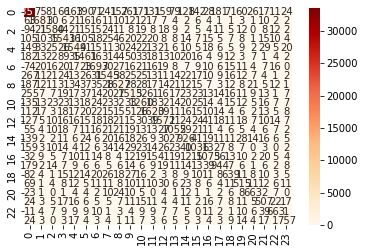

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.2471583508151316
MSE: 14.047728737334266
RMSE: 3.748029980847841


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

Precision Score :  0.8364016814524866
Recall Score :  0.8363429448946293
f1_score :  0.8363341779418331
